<h2>14-2 t 검정 - 두 집단의 평균 비교하기</h2>

<h3>compact 자동차와 suv 자동차의 도시 연비 t 검정</h3>

1. mpg 데이터를 불러와 category가 compact인 자동차와 suv인 자동차의 빈도와 cty 평균을 구함.

In [1]:
# mpg 데이터 불러오기
import pandas as pd
mpg = pd.read_csv('D:/WE_IT/doit/bookdata/mpg.csv')

# 기술 통계 분석
mpg.query('category in ["compact", "suv"]') \
   .groupby('category', as_index = False) \
   .agg(n    = ('category', 'count'),
        mean = ('cty', 'mean'))


,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


출력결과 도시 연비 평균이 compact는 20, suv는 13이므로 suv보다 compact가 더 높음.

2. 위에서 구한 평균 차이가 통계적으로 유의한지 t 검정을 수행함.

In [2]:
# mpg에서 category가 compact인 행과 suv인 행의 cty를 추출해 각각 변수에 할당
compact = mpg.query('category == "compact"')['cty']
suv = mpg.query('category == "suv"')['cty']

In [3]:
# t-test
from scipy import stats
stats.ttest_ind(compact, suv, equal_var = True)

TtestResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21, df=107.0)

출력결과의 pvalue가 유의확률을 의미함. 일반적으로 유의확률 5%를 판단 기준으로 삼음. 
<br>‘pvalue=2.3909550904711282e-21’ 은 ‘2.3909550904711282 앞에 0이 21개 있는 값’보다 작다는 의미임. 
<br>즉, p-value가 0.05보다 작기 때문에 이 분석 결과는 ‘compact와 suv간 평균 도시 연비 차이가 통계적으로 유의하다’고 결론 내릴 수 있음.

<hr>

<h3>일반 휘발유와 고급 휘발유의 도시 연비 t 검정</h3>

In [4]:
# 기술 통계 분석
mpg.query('fl in ["r", "p"]') \
   .groupby('fl', as_index = False) \
   .agg(n    = ('fl', 'count'),
        mean = ('cty', 'mean'))

,fl,n,mean
0,p,52,17.365385
1,r,168,16.738095


In [5]:
regular = mpg.query('fl == "r"')['cty']
premium = mpg.query('fl == "p"')['cty']

# t-test
stats.ttest_ind(regular, premium, equal_var = True)

TtestResult(statistic=-1.066182514588919, pvalue=0.28752051088667036, df=218.0)

p-value가 0.05보다 큰 0.2875임. 실제로는 차이가 없는데 우연에 의해 이런 정도의 차이가 관찰될 확률이 28.75%라는 의미임. 
<br>따라서 ‘일반 휘발유와 고급 휘발유를 사용하는 자동차의 도시 연비 차이가 통계적으로 유의하지 않다’고 결론 내릴 수 있음. 
<br>즉, 두 평균의 차이가 우연히 발생했을 가능성이 크다고 해석하는 것.

<hr>

<h2>14-3 상관분석 - 두 변수의 관계 분석하기</h2>

<h3>실업자 수와 개인 소비 지출의 상관관계</h3>

1. 상관계수 구하기

In [6]:
# economics 데이터 불러오기
economics = pd.read_csv('D:/WE_IT/doit/bookdata/economics.csv')

# 상관행렬 만들기
economics[['unemploy', 'pce']].corr()

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


2. 유의확률 구하기

In [7]:
# 상관분석
stats.pearsonr(economics['unemploy'], economics['pce'])

PearsonRResult(statistic=0.614517614193208, pvalue=6.773527303289964e-61)

첫 번째 값이 상관계수, 두 번째 값이 유의확률을 의미함. 
<br>유의확률이 0.05 미만이므로, 실업자 수와 개인 소비 지출의 상관관계가 통계적으로 유의하다고 결론 내릴 수 있음. 

<hr>

<h3>상관행렬 히트맵 만들기</h3>

1. 상관행렬 만들기

In [8]:
mtcars = pd.read_csv('D:/WE_IT/doit/bookdata/mtcars.csv')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
car_cor = mtcars.corr()       # 상관행렬 만들기
car_cor = round(car_cor, 2)   # 소수점 둘째 자리까지 반올림
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


2. 히트맵 만들기

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi'     : '120',        # 해상도 설정
                     'figure.figsize' : [7.5, 5.5]})  # 가로 세로 크기 설정


<Axes: >

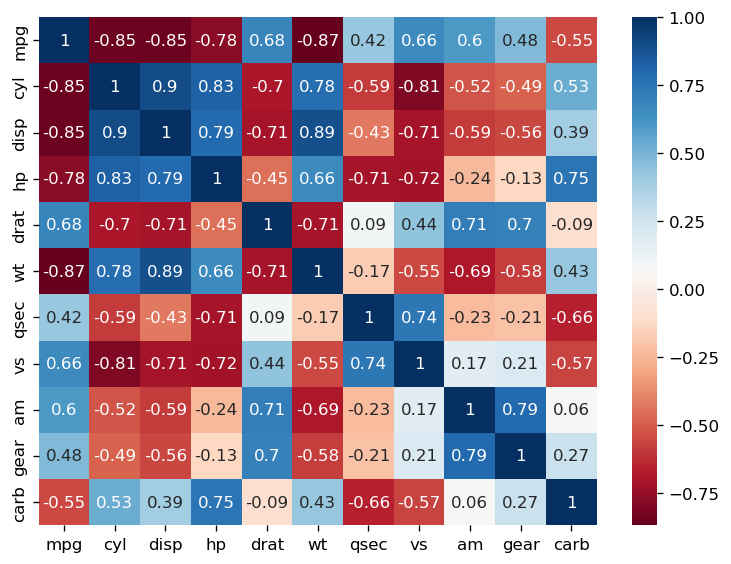

In [11]:
# 히트맵 만들기
import seaborn as sns
sns.heatmap(car_cor,
            annot = True,   # 상관계수 표시
            cmap = 'RdBu')  # 컬러맵

히트맵은 상관계수가 클수록 상자 색깔을 진하게 표현하고, 상관계수가 양수면 파란색, 음수면 빨간색 계열로 표현함.

3. 대각 행렬 제거하기

(1) mask 만들기

In [12]:
# mask 만들기
import numpy as np
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
# 오른쪽 위 대각 행렬을 1로 바꾸기
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

(2) 히트맵에 mask 적용하기

<Axes: >

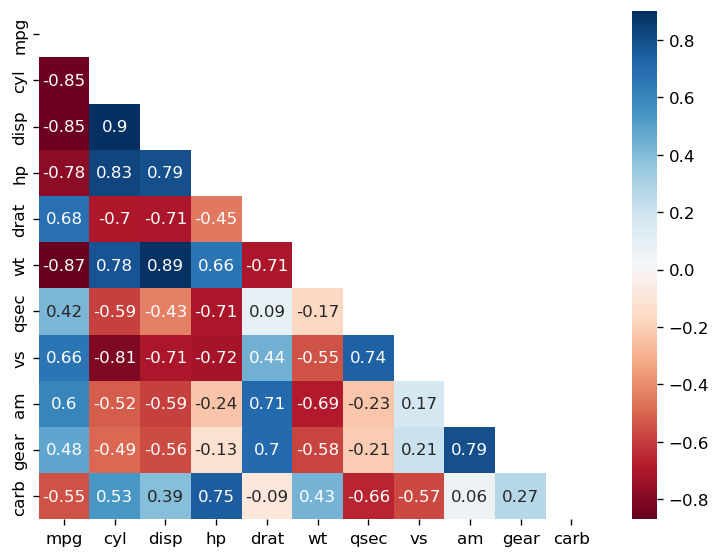

In [15]:
# 히트맵 만들고 mask 적용하기
sns.heatmap(data = car_cor,
            annot = True,   # 상관계수 표시
            cmap = 'RdBu',  # 컬러맵
            mask = mask)    # mask 적용

(3) 빈 행과 열 제거하기
<br>위의 히트맵을 보면 왼쪽 위 mpg 행과 오른쪽 아래 carb 열에 아무 값도 표현되어 있지 않은데, 행과 열의 변수가 같아서 상관계수가 항상 1이 되는 위치이기 때문. 
<br>히트맵의 빈 행과 열을 제거하려면 mask와 상관행렬의 첫 번째 행과 마지막 열을 제거한 다음 히트맵을 만들면 됨.

<Axes: >

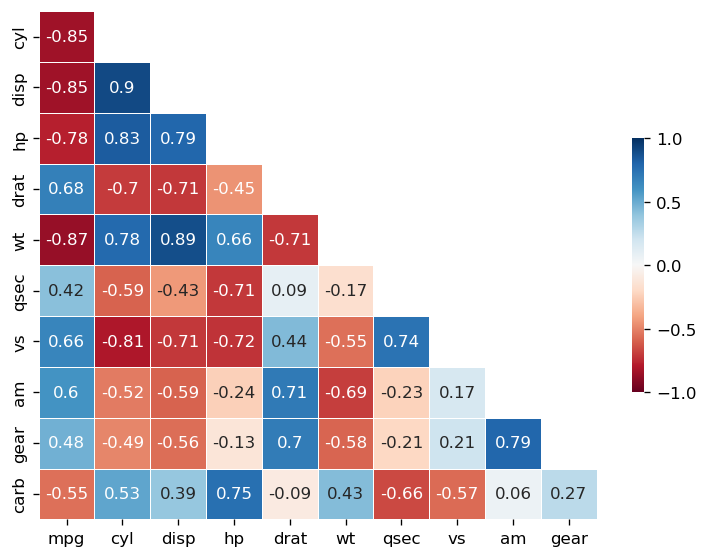

In [17]:
mask_new = mask[1:, :-1]         # mask의 첫 번째 행, 마지막 열 제거
cor_new = car_cor.iloc[1:, :-1]  # 상관행렬 첫 번째 행, 마지막 열 제거

# 히트맵 만들기
sns.heatmap(data = cor_new,
            annot = True,                # 상관계수 표시
            cmap = 'RdBu',               # 컬러맵
            mask = mask_new,             # mask 적용
            # 밑의 코드는 파라미터를 추가해 히트맵을 보기 좋게 수정한 것
            linewidths = .5,             # 경계 구분선 추가
            vmax = 1,                    # 가장 진한 파란색으로 표현할 최대값
            vmin = -1,                   # 가장 진한 빨간색으로 표현할 최소값
            cbar_kws = {'shrink':  .5})  # 범례 크기 줄이기